# US Computer and Mathematical Employment Analysis
----

### Analysis
* At nation level in 2017, administrative Support, sales and food preparation and serving are the 3 largest major occupations. Computer and Mathematical occupations rank No. 14 among 22 major occupation catergories. Inside computer and mathematical occupations, software developers, computer user support specialists and computer analysts are the 
* At state level in 2017, California, Texas, and New York are the top 3 states for employment number in computer and mathematical employment.
* Trends.
---


In [5]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#%matplotlib notebook

#dependencies for plotly
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [2]:
#file source
excel_path = "Resources/state_M2017_dl.xlsx"

#read the excel file
state17_df = pd.read_excel(excel_path, index_col=None)
state17_df.head()

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,m,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,AL,Alabama,00-0000,All Occupations,total,1922570,0.4,1000,1,...,15.77,25.01,37.83,17770,21740,32800,52020,78690,NaN,NaN
1,1,AL,Alabama,11-0000,Management Occupations,major,69950,1,36.385,0.71,...,46.63,64.12,90.8,52130,70130,96980,133360,188860,NaN,NaN
2,1,AL,Alabama,11-1011,Chief Executives,detailed,1120,6,0.585,0.4,...,94.45,#,#,84520,125290,196460,#,#,NaN,NaN
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,27150,1.6,14.123,0.91,...,49.19,71.09,#,54040,72610,102320,147860,#,NaN,NaN
4,1,AL,Alabama,11-1031,Legislators,detailed,1100,12,0.572,1.59,...,*,*,*,16310,17280,18910,24630,47510,True,NaN


In [3]:
state17_df.keys()

Index(['AREA', 'ST', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP',
       'm', 'JOBS_1000', 'LOC_Q', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10',
       'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25',
       'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

In [6]:
#delete some columns
state17_df = state17_df[['ST', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 
                           'TOT_EMP', 'JOBS_1000', 'A_MEAN', 'MEAN_PRSE','A_MEDIAN']]
state17_df.head()

,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,JOBS_1000,A_MEAN,MEAN_PRSE,A_MEDIAN
0,AL,Alabama,00-0000,All Occupations,total,1922570,1000,43170,0.5,32800
1,AL,Alabama,11-0000,Management Occupations,major,69950,36.385,111150,0.6,96980
2,AL,Alabama,11-1011,Chief Executives,detailed,1120,0.585,207090,3.2,196460
3,AL,Alabama,11-1021,General and Operations Managers,detailed,27150,14.123,120730,0.8,102320
4,AL,Alabama,11-1031,Legislators,detailed,1100,0.572,25410,4.6,18910


In [7]:
#delete the rows that the employment estimate is not available (**), replace with na and drop na
state17_df = state17_df.replace("**", np.nan)
state17_df = state17_df.dropna(how="any")

state17_df.count()

ST           35506
STATE        35506
OCC_CODE     35506
OCC_TITLE    35506
OCC_GROUP    35506
TOT_EMP      35506
JOBS_1000    35506
A_MEAN       35506
MEAN_PRSE    35506
A_MEDIAN     35506
dtype: int64

In [8]:
state17_df.dtypes

ST            object
STATE         object
OCC_CODE      object
OCC_TITLE     object
OCC_GROUP     object
TOT_EMP      float64
JOBS_1000    float64
A_MEAN        object
MEAN_PRSE     object
A_MEDIAN      object
dtype: object

In [9]:
#creat variables to hold the parameters for filter occupations needed
map_occ_code = "15-0000"
map_occ_tit = "Computer and Mathematical Occupations"

#filter the defined occupation catergory
occ_map_df = state17_df.loc[state17_df['OCC_CODE'] == map_occ_code, :]
occ_map_df.head()

,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,JOBS_1000,A_MEAN,MEAN_PRSE,A_MEDIAN
63,AL,Alabama,15-0000,Computer and Mathematical Occupations,major,39760.0,20.680,81870,1,77590
784,AK,Alaska,15-0000,Computer and Mathematical Occupations,major,5450.0,17.124,81820,2.3,76800
1344,AZ,Arizona,15-0000,Computer and Mathematical Occupations,major,93490.0,34.573,82940,1.2,79550
2100,AR,Arkansas,15-0000,Computer and Mathematical Occupations,major,23850.0,19.873,68360,2.5,64850
2802,CA,California,15-0000,Computer and Mathematical Occupations,major,590550.0,35.373,105380,0.9,100480


In [12]:
occ_map_df.to_csv("images/occ_map_df.csv", index=False, encoding="utf-8", header=True)

In [13]:
scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

In [14]:
#create text to show infor for each state on the map
occ_map_df['text'] = occ_map_df['STATE'] + '<br>' + \
'Annual Median Wage: '+ '<br>' + \
'$' + occ_map_df['A_MEDIAN'].astype(str)
occ_map_df.head()

C:\Users\h4wth\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,JOBS_1000,A_MEAN,MEAN_PRSE,A_MEDIAN,text
63,AL,Alabama,15-0000,Computer and Mathematical Occupations,major,39760.0,20.680,81870,1,77590,Alabama<br>Annual Median Wage: <br>$77590
784,AK,Alaska,15-0000,Computer and Mathematical Occupations,major,5450.0,17.124,81820,2.3,76800,Alaska<br>Annual Median Wage: <br>$76800
1344,AZ,Arizona,15-0000,Computer and Mathematical Occupations,major,93490.0,34.573,82940,1.2,79550,Arizona<br>Annual Median Wage: <br>$79550
2100,AR,Arkansas,15-0000,Computer and Mathematical Occupations,major,23850.0,19.873,68360,2.5,64850,Arkansas<br>Annual Median Wage: <br>$64850
2802,CA,California,15-0000,Computer and Mathematical Occupations,major,590550.0,35.373,105380,0.9,100480,California<br>Annual Median Wage: <br>$100480


In [15]:
#use plotly to generate heapmap for the number of employment
    
data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = occ_map_df['ST'],
    z = occ_map_df['TOT_EMP'].astype(float),
    locationmode = 'USA-states',
    text = occ_map_df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Number of Employment")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = f'2017 US Employment of {map_occ_tit}'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig, filename = 'Occupation_map')

In [32]:
#use plotly to generate heapmap for the annual median wage of the occupation
data_wage = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = occ_map_df['ST'],
    z = occ_map_df['A_MEDIAN'].astype(float),
    locationmode = 'USA-states',
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Annual Median Wage ($)")
)]

layout_wage = go.Layout(
    title = go.layout.Title(
        text = f'2017 US Employment of {map_occ_tit}'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig_wage = go.Figure(data = data_wage, layout = layout_wage)
plotly.offline.iplot(fig_wage, filename = 'Occupation_map_wage')

In [17]:
#pie chart for the number of employment by major occupation

#group by occ_code and calculate the nation data (use the agg function)
aggreations = {'TOT_EMP':"sum"}
major_df = state17_df[state17_df['OCC_GROUP'] == "major"].groupby(
           ['OCC_CODE','OCC_TITLE'],as_index=False).agg(aggreations) 
            #(index=False to make CODE and TITLE columnes not index column, for pie label purpose)

major_df

,OCC_CODE,OCC_TITLE,TOT_EMP
0,11-0000,Management Occupations,7327160.0
1,13-0000,Business and Financial Operations Occupations,7518560.0
2,15-0000,Computer and Mathematical Occupations,4273060.0
3,17-0000,Architecture and Engineering Occupations,2531630.0
4,19-0000,"Life, Physical, and Social Science Occupations",1154620.0
5,21-0000,Community and Social Service Occupations,2113720.0
6,23-0000,Legal Occupations,1101380.0
7,25-0000,"Education, Training, and Library Occupations",8800500.0
8,27-0000,"Arts, Design, Entertainment, Sports, and Media...",1933340.0
9,29-0000,Healthcare Practitioners and Technical Occupat...,8562280.0


C:\Users\h4wth\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning:


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



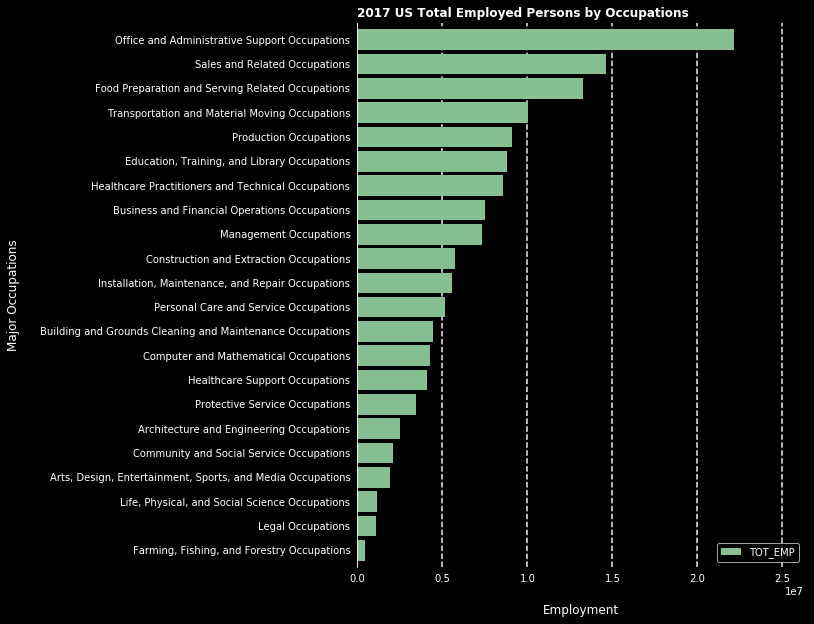

In [21]:
#group by occ_code and calculate the nation data (use the agg function)
aggreations = {'TOT_EMP':"sum"}
major_df = state17_df[state17_df['OCC_GROUP'] == "major"].groupby(['OCC_TITLE']).agg(aggreations) 

#sort the data based on employment number
major_sort = major_df.sort_values('TOT_EMP', ascending=True)
#make horizon bar
major_bar = major_sort.plot(kind="barh",figsize=(8, 10), color="#86bf91", zorder=2, width=0.85)

# Despine
major_bar.spines['right'].set_visible(False)
major_bar.spines['top'].set_visible(False)
major_bar.spines['bottom'].set_visible(False)

# Switch off ticks
major_bar.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = major_bar.get_xticks()
for tick in vals:
      major_bar.axvline(x=tick, linestyle='dashed', alpha=1, color='#eeeeee', zorder=1)
    
# Set x-axis label
major_bar.set_xlabel("Employment", labelpad=20, size=12)
# Set y-axis label
major_bar.set_ylabel("Major Occupations", labelpad=20, size=12)
# Set title
major_bar.set_title("2017 US Total Employed Persons by Occupations", size=12, loc="left", fontweight='bold')
plt.style.use('dark_background')
#save the figure
plt.savefig("images/major_bar_2017.png",bbox_inches = 'tight')
plt.show()

C:\Users\h4wth\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning:


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



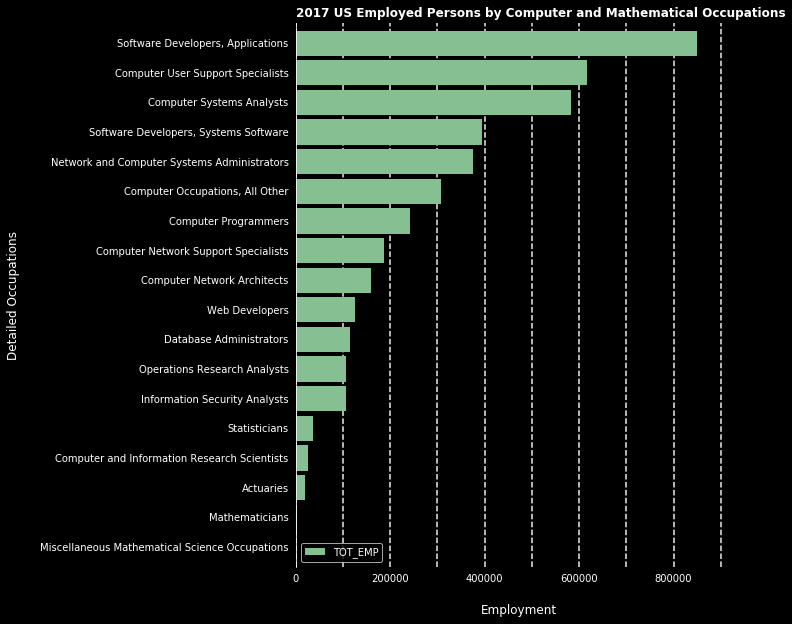

In [23]:
#group by occ_code and calculate the nation data (use the agg function)
aggreations = {'TOT_EMP':"sum"}
computer_df = state17_df[(state17_df['OCC_CODE'].str.contains("15-1")) | (state17_df['OCC_CODE'].str.contains("15-2"))].groupby(['OCC_TITLE']).agg(aggreations) 


#sort the data based on employment number
computer_sort = computer_df.sort_values('TOT_EMP', ascending=True)
#make horizon bar
computer_bar = computer_sort.plot(kind="barh",figsize=(8, 10), color="#86bf91", zorder=2, width=0.85)

# Despine
computer_bar.spines['right'].set_visible(False)
computer_bar.spines['top'].set_visible(False)
computer_bar.spines['bottom'].set_visible(False)

# Switch off ticks
computer_bar.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = computer_bar.get_xticks()
for tick in vals:
      computer_bar.axvline(x=tick, linestyle='dashed', alpha=1, color='#eeeeee', zorder=1)

# Set x-axis label
computer_bar.set_xlabel("Employment", labelpad=20, size=12)
# Set y-axis label
computer_bar.set_ylabel("Detailed Occupations", labelpad=20, size=12)
# Set title
computer_bar.set_title("2017 US Employed Persons by Computer and Mathematical Occupations", size=12, loc="left",
                      fontweight='bold')
plt.style.use('dark_background')
#save the figure
plt.savefig("images/computer_bar_2017.png",bbox_inches = 'tight')
plt.show()
